<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/thesis_test_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display
import librosa
import librosa.display

In [23]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os

In [19]:
audio_path = '/content/drive/My Drive/Thesis/music/audio-path.mp3'

In [20]:
audio_path

'/content/drive/My Drive/Thesis/music/audio-path.mp3'

#Chromagram

In [40]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
librosa.feature.chroma_stft(y=y, sr=44100)

array([[1.        , 0.92399746, 0.7038389 , ..., 0.007217  , 0.02019316,
        0.09409434],
       [0.6463096 , 0.6722195 , 0.5537204 , ..., 0.01338808, 0.04401801,
        0.3017844 ],
       [0.916479  , 1.        , 1.        , ..., 0.00531661, 0.0266406 ,
        0.2684584 ],
       ...,
       [0.72184116, 0.8399234 , 0.6835081 , ..., 0.22309755, 0.26063728,
        0.24766542],
       [0.48878533, 0.5399641 , 0.7908798 , ..., 1.        , 1.        ,
        1.        ],
       [0.6258163 , 0.6068444 , 0.89401937, ..., 0.19403924, 0.20403166,
        0.30918407]], dtype=float32)

In [41]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 0.9661165 , 0.7772282 , ..., 0.13318835, 0.18989752,
        0.3935394 ],
       [0.78305167, 0.8113872 , 0.68416506, ..., 0.20976837, 0.31590322,
        0.5803333 ],
       [0.98052114, 1.        , 1.        , ..., 0.09608693, 0.22252622,
        0.5267887 ],
       ...,
       [0.78441614, 0.84875655, 0.761384  , ..., 0.3298685 , 0.41746518,
        0.5233873 ],
       [0.6365439 , 0.73317903, 0.86697483, ..., 1.        , 1.        ,
        1.        ],
       [0.72599566, 0.79662144, 0.8945896 , ..., 0.349559  , 0.39161816,
        0.57734025]], dtype=float32)

In [42]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.9815306 , 0.8530636 , 0.9129591 , ..., 0.0085975 , 0.0067877 ,
        0.01750344],
       [0.72599363, 0.63452905, 0.6162038 , ..., 0.0268957 , 0.02085953,
        0.05817895],
       [1.        , 1.        , 0.7568739 , ..., 0.0046199 , 0.0042472 ,
        0.03661858],
       ...,
       [0.7490459 , 0.8445298 , 0.7528402 , ..., 0.184292  , 0.1752314 ,
        0.19496618],
       [0.59976447, 0.9504211 , 0.8419024 , ..., 1.        , 1.        ,
        1.        ],
       [0.73709357, 0.936421  , 0.8768868 , ..., 0.14062138, 0.14834358,
        0.17013586]], dtype=float32)

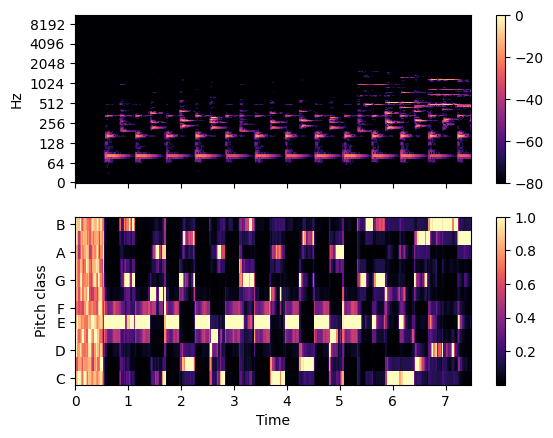

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

#Mel-frequencu cepstral coeffients (MFCC) 
 สัมประสิทธิ์เซปตรัมสเกลเมล เป็นการปรับสเปกตรัมให้อยู่ในสเกลที่เหมาะสมสำหรับการรับฟังของมนุษย์

In [45]:
y, sr = librosa.load(librosa.ex('nutcracker'))
librosa.feature.mfcc(y=y, sr=sr)

array([[-602.36005, -602.36005, -602.36005, ..., -602.36005, -602.36005,
        -602.36005],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

##Using a different hop length and HTK-style Mel frequencies

In [46]:
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-578.1849, -578.1849, -578.1849, ..., -578.1849, -578.1849,
        -578.1849],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

##Use a pre-computed log-power Mel spectrogram

In [47]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[-603.1944, -603.1944, -603.1944, ..., -603.1944, -603.1944,
        -603.1944],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [48]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
mfccs

array([[-602.36005, -602.36005, -602.36005, ..., -602.36005, -602.36005,
        -602.36005],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

[Text(0.5, 1.0, 'MFCC')]

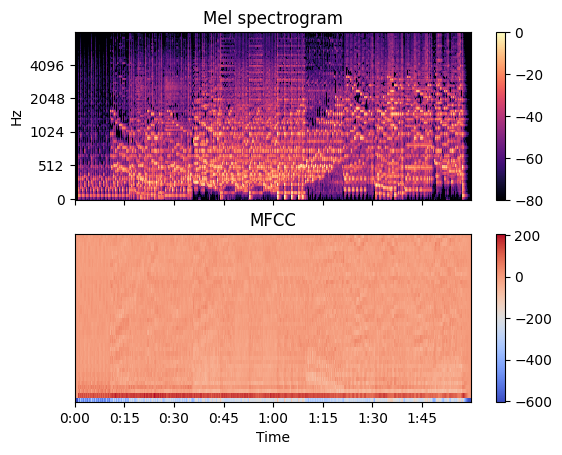

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [21]:
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [22]:
librosa.load(audio_path, sr=44100) #ถอดรหัสเสียง 1 มิติ  #ต้องทำความเข้าใจตัวเลขในarray

<ipython-input-22-289752fa308a>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  librosa.load(audio_path, sr=44100) #ถอดรหัสเสียง 1 มิติ  #ต้องทำความเข้าใจตัวเลขในarray
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))

In [ ]:
librosa.display.waveshow(y, sr=sr)

In [ ]:
#display Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))


In [ ]:
plt.figure(figsize=(14, 5))

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')


In [ ]:
plt.colorbar()